<a href="https://colab.research.google.com/github/raghavjoshi03/coursera-assignments/blob/main/ANN_Digit_recognition_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop, Adam, Adamax
import pylab as plt


In [7]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784) train samples
(10000, 784) test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


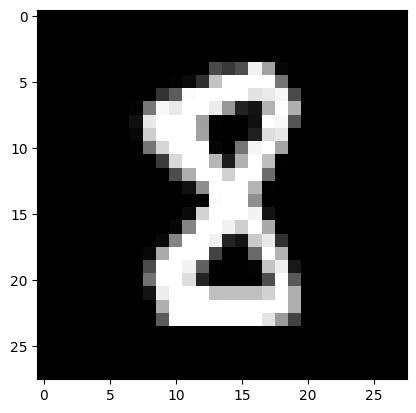

In [ ]:
print("Label:",y_test[179:180])
plt.imshow(x_test[179:180].reshape(28,28), cmap='gray')
plt.show()

In [8]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 36842 (143.91 KB)
Trainable params: 36842 (143.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


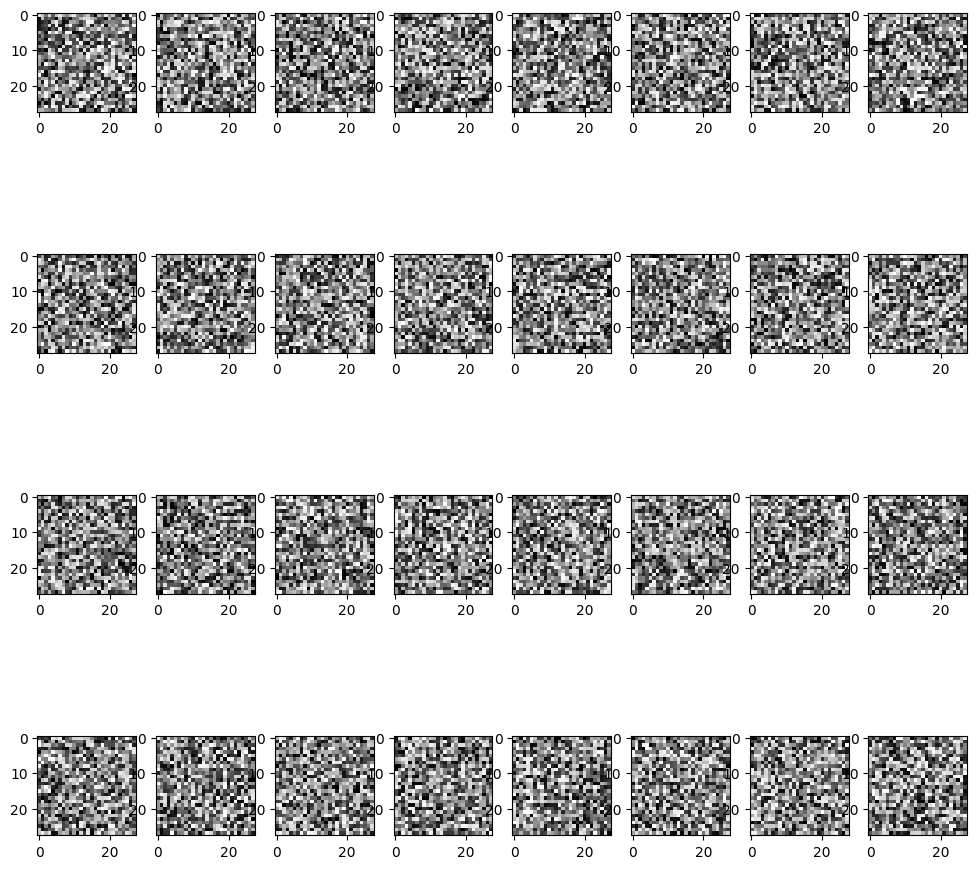

In [9]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(),
              metrics=['accuracy'])

In [11]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.8356 - accuracy: 0.4605
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8596 - accuracy: 0.7761
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5212 - accuracy: 0.8662
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8939
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9069
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3012 - accuracy: 0.9156
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.9227
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2513 - accuracy: 0.9290
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2330 - accuracy: 0.9338
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2171 - accuracy: 0.9384

Shape of First Layer (784, 32)
Visualization of First Layer


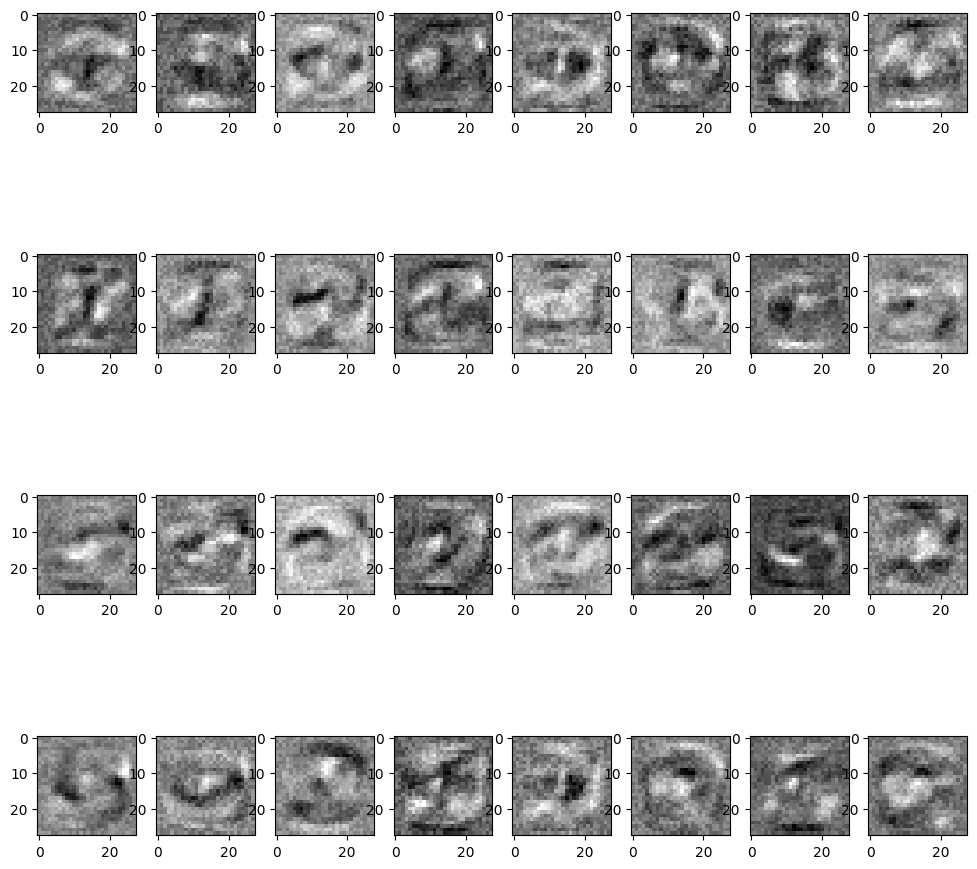

Shape of First Layer (784, 32)
Visualization of First Layer


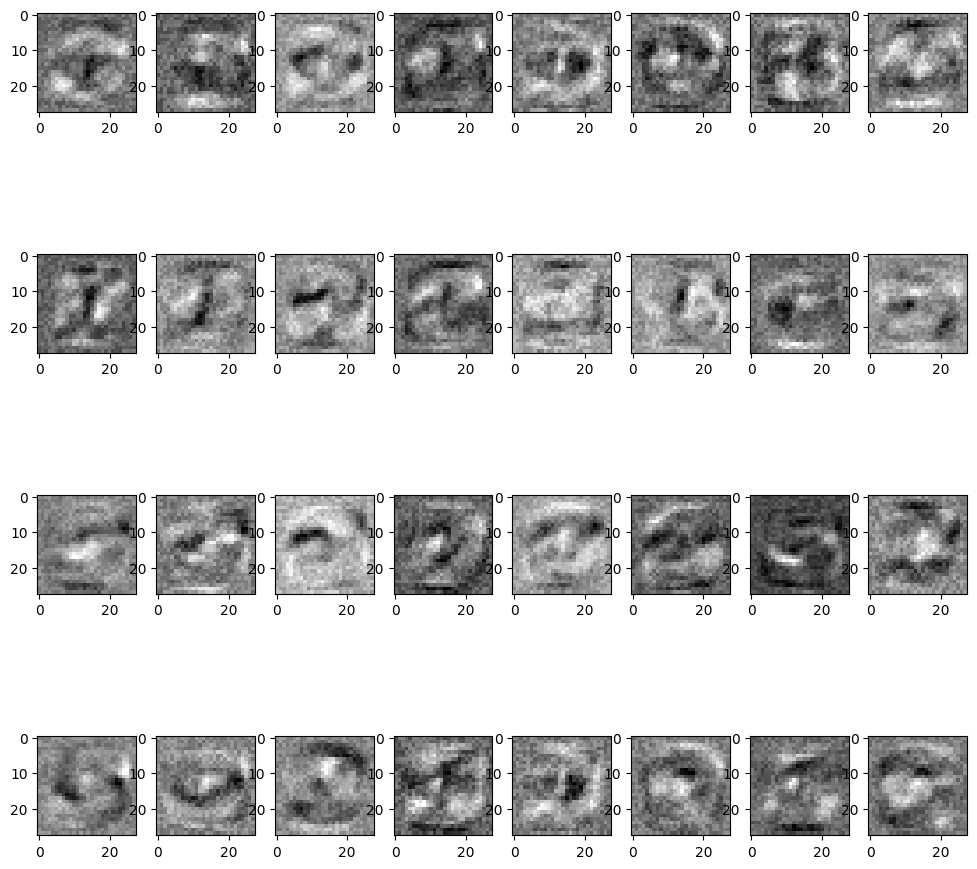

In [13]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [16]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('1.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

error: ignored

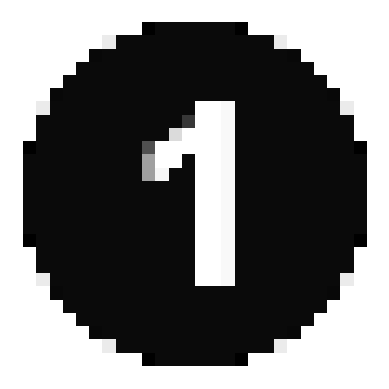

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/1.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 380ms/step
Prediction Score:
 [1.5638729e-07 5.1096879e-04 1.9053635e-04 1.8665406e-03 1.0655832e-05
 2.0441937e-04 8.2850693e-07 4.4391618e-06 9.9540675e-01 1.8047767e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 0 1 0]

Predicted Digit:
 8


In [17]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,))) #input layer
model.add(Dense(8, activation='sigmoid')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 6280      
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 5s 8ms/step - loss: 2.0685 - accuracy: 0.4695 - val_loss: 1.8256 - val_accuracy: 0.6543
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 1.5705 - accuracy: 0.6680 - val_loss: 1.3313 - val_accuracy: 0.6836
Te

In [18]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,))) #input layer
model.add(Dense(8, activation='relu')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 6280      
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 5s 6ms/step - loss: 1.1822 - accuracy: 0.6101 - val_loss: 0.6052 - val_accuracy: 0.8378
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.8599 - val_loss: 0.4287 - val_accuracy: 0.8778
Te

In [19]:
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(784,))) #input layer
model.add(Dense(8, activation='tanh')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 6280      
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 5s 7ms/step - loss: 1.1967 - accuracy: 0.7164 - val_loss: 0.7509 - val_accuracy: 0.8408
Epoch 2/2
469/469 [==============================] - 3s 7ms/step - loss: 0.5897 - accuracy: 0.8548 - val_loss: 0.4780 - val_accuracy: 0.8719
Te

In [20]:
model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,))) #input layer
model.add(Dense(8, activation='linear')) #hidden layer
model.add(Dense(num_classes, activation='softmax')) #output layer

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 6280      
                                                                 
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 10)                90        
                                                                 
Total params: 6442 (25.16 KB)
Trainable params: 6442 (25.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 6s 7ms/step - loss: 0.7862 - accuracy: 0.7688 - val_loss: 0.4593 - val_accuracy: 0.8699
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.4052 - accuracy: 0.8844 - val_loss: 0.3607 - val_accuracy: 0.8971
Te